<a href="https://colab.research.google.com/github/Evelyn-Rojas/Ecuaciones-diferenciales-parciales-ll/blob/main/Minimos_Cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='orchid'> **Evelyn Tania Rojas Roa**
____

# <font color='violet'> **MÉTODO DE MÍNIMOS CUADRADOS**

---



Considerar el siguiente problema:

 $$u'' + u = x$$

s.a

$$u(0) = 0$$
$$u'(0) = 2$$

Solución exacta:

$$u( x) = x + \sin(x)$$

Se necesita la aproximación de la forma:

$$u_N = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \ldots$$

**Usaremos hasta el polinomio de grado 3**

In [1]:
#Importamos las librerías necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x,a,b=sp.symbols('x a b') #variable
u=sp.Function('u') #esto es una función

In [3]:
#Obtenemos la solución
ode=u(x).diff(x,x)+u(x)-x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [4]:
#Ingresamos las condiciones iniciales del problema
sol=sp.dsolve(ode,ics={u(0):0, u(x).diff(x).subs(x,0):2})
#es la estructura de un diccionario

<font color='cyan'>Solución exacta:

In [6]:
sol #Coincide con la obtenida resolviendola analíticamente

Eq(u(x), x + sin(x))

In [8]:
u_expr=sol.rhs #Extrae la expresión simbólica de la solución
u_num=sp.lambdify(x,u_expr, 'numpy') #Convierte la expresión simbólica de sympy a una función numérica rápida compatible con numpy
#esto nos permitira poder gráficar

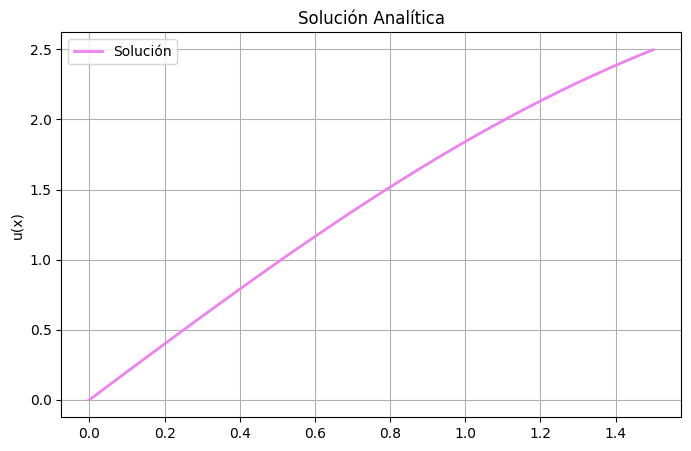

In [97]:
xx=np.linspace(0,1.5,100) #Genera números aleatorios
yy=u_num(xx)
plt.figure(figsize=(8,5))
plt.plot(xx,yy,label='Solución',color='violet',linewidth=2)
plt.title('Solución Analítica')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()
#Solo utilizaremos el rango 0,1 aunque si se extiende se pueden ver las oscilaciones de la solución

* Proponemos la función de prueba:



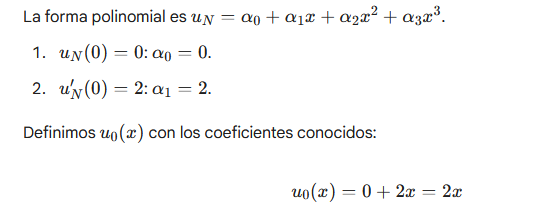

In [12]:
#Función
u_n = 2*x+a*x**2+b*x**3

In [14]:
print('Tendremos:')
u_n

Tendremos:


a*x**2 + b*x**3 + 2*x

* Definimos el error (residuo) E:

In [16]:
u_n_2=sp.diff(u_n,x,2) #Segunda derivada
E=u_n_2+u_n-x

In [18]:
print('Error:')
E

Error:


a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [19]:
E.simplify()

a*x**2 + 2*a + b*x**3 + 6*b*x + x

Imponemos las condiciones para los puntos criticos del residuo:

$$
\int_{0}^{1} E^2(x)\,\frac{\partial E}{\partial a}\, dx = 0,
\qquad
\int_{0}^{1} E^2(x)\,\frac{\partial E}{\partial b}\, dx = 0.
$$



y resolvemos el sistema de ecuaciones resultante

In [46]:
#Ahora hacemos ambas derivadas
dIa=sp.diff(E,a)
dIb=sp.diff(E,b)

In [87]:
eq1 = sp.integrate(E*dIa, (x, 0, 1))
eq2 = sp.integrate(E*dIb, (x, 0, 1))

In [88]:
sol = sp.solve((eq1, eq2), [a,b])

In [89]:
sol

{a: -1335/86789, b: -24759/173578}

In [90]:
alpha_2_val = sol[a]
alpha_3_val = sol[b]

In [91]:
u_approx_expr = u_n.subs({a: alpha_2_val, b: alpha_3_val})

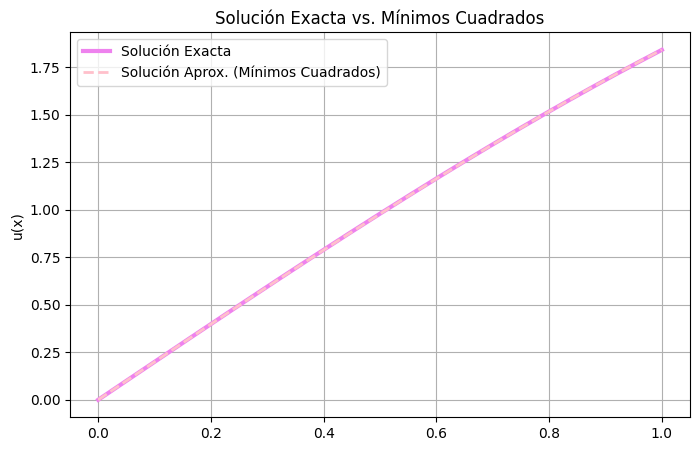

In [98]:
#Solución analítica
u_exacta_expr = x + sp.sin(x)
# Convertimos las expresiones simbólicas a funciones numéricas
u_aprox_num = sp.lambdify(x, u_approx_expr, 'numpy')
u_exacta_num = sp.lambdify(x, u_exacta_expr, 'numpy')
xx = np.linspace(0, 1, 300) #Elegimos este rango debido a que será la parte de mayor presición, puesto que si queremos en un rango
#amplio debemos aumentar el grado del polinomio
yy_aprox = u_aprox_num(xx)
yy_exacta = u_exacta_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy_exacta, label='Solución Exacta', color='violet', linewidth=3)
plt.plot(xx, yy_aprox, label='Solución Aprox. (Mínimos Cuadrados)', color='pink', linestyle='--', linewidth=2)
plt.title('Solución Exacta vs. Mínimos Cuadrados')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

* Error de la aproximación:

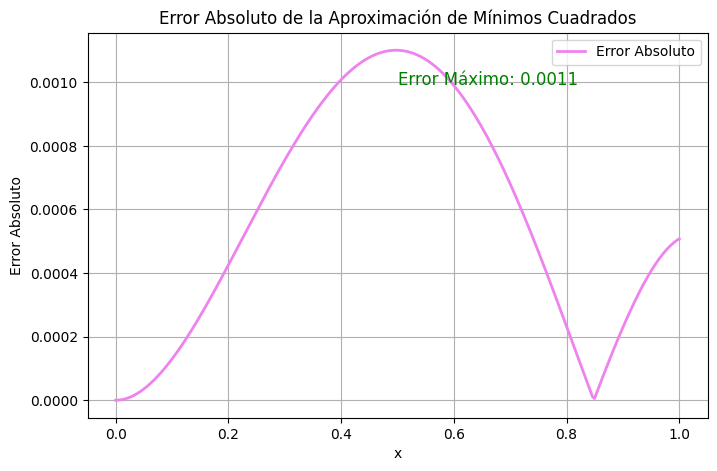

In [109]:
# Gráfica del Error Absoluto (para visualizar el error de truncamiento)
E_abs = np.abs(yy_exacta - yy_aprox) # Usamos los datos del rango completo (xx)
plt.figure(figsize=(8, 5))
plt.plot(xx, E_abs, label=r'Error Absoluto', color='violet', linewidth=2)
plt.title('Error Absoluto de la Aproximación de Mínimos Cuadrados')
plt.xlabel('x')
plt.ylabel('Error Absoluto')
plt.grid(True)
plt.legend()
error_max = np.max(E_abs)
plt.annotate(f'Error Máximo: {error_max:.4f}',
             xy=(0.5, error_max * 0.9),
             xytext=(0.5, error_max * 0.9),
             fontsize=12, color='green')
plt.show()